## Описание задачи

Рассматривается задача бинарной классификации прогнозирования дождя. За основу взяты данные о погоде в Австралии.

Импортируем необходимые для работы библиотеки:

In [ ]:
import numpy as np              # Библиотека для работы с массивами
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline
                                # Вывод графиков внутри веб-браузера
import pandas as pd             # Библиотека с необходимыми струкурами данных (dataframe, series)
import seaborn as sns           # Визуализация данный
import sklearn                  # Алгоритмы машинного обучения

## 1) Чтение данных и предварительаная обработка

In [ ]:
dt = pd.read_csv('Weather Training Data.csv')
dt.head()

row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0   Row0   Albury     13.4     22.9       0.6          NaN       NaN   
1   Row1   Albury      7.4     25.1       0.0          NaN       NaN   
2   Row2   Albury     17.5     32.3       1.0          NaN       NaN   
3   Row3   Albury     14.6     29.7       0.2          NaN       NaN   
4   Row4   Albury      7.7     26.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2           W           41.0        ENE  ...        82.0         33.0   
3         WNW           56.0          W  ...        55.0         23.0   
4           W           35.0        SSE  ...        48.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1010.8       1006.0       7.0       8.0     17.8     29.7         No   
3       1009.2       1005.4       NaN       NaN     20.6     28.9         No   
4       1013.4       1010.1       NaN       NaN     16.3     25.5         No   

   RainTomorrow  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 23 columns]

In [ ]:
dt.shape # Почти 10.000 записей в таблице и 23 признака

(99516, 23)

Каждый запись представляет собой данные о погоде в конкртном месте. Опишем признаки более подробно.

In [ ]:
dt.columns


Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

### Названия признаков:

- Location - Город в Австралии
- MinTemp - минимальная температура в течение дня по Цельсию
- MaxTemp - максимальная температура в течение дня по Цельсию
- Rainfall - количество осадков в миллиметрах, зарегистрированных за день
- Evaporation - испарение в течение дня (мм)
- Sunshine - сколько солнечных часов в течение дня
- WindGusDir - напраление самого мощного порыва ветра за день
- WindGuSpeed - скорость самого сильного порыва ветра за день (км/ч)
- WindDir9am - направление ветра в 09:00
- WindDir3pm - направление ветра в 15:00
- WindSpeed9am - скорость ветра более 10 минут до 09:00 (км/ч)
- WindSpeed3pm - скорость ветра более 10 минут до 15:00 (км/ч)
- Humidity9am - относительная влажность в 09:00 (%)
- Humidity3pm - относительная влажность в 15:00 (%)
- Pressure9am - атмосферное давление в 09:00 (гПа)
- Pressure3pm - атмосферное давление в 15:00 (гПа)
- Cloud9am - часть неба, скрытая под облаками в 09:00
- Cloud3pm - часть неба, скрытая под облаками в 15:00
- Temp9am - температура в 9 утра в градусах Цельсия
- Temp3pm - температура в 15:00 в градусах Цельсия
- RainToday - переменная, равная "Yes", если сегодня дождь, и "No" - если дождя нет
- RainTomorrow - переменная, равная 1, если завтра будет дождь, и 0 - если не будет

### Типы признаков:

In [ ]:
dt.dtypes

row ID            object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

Для более понятного описания данных избавимся от типа данных oblect. Так как слолбец `row ID` является аналогом номером строки, который есть в таблице по умолчанию, то удалим этот стоблец.

In [ ]:
dt['Location'] = dt['Location'].astype('string')
dt['WindGustDir'] = dt['WindGustDir'].astype('category')
dt['WindDir9am'] = dt['WindDir9am'].astype('category')
dt['WindDir3pm'] = dt['WindDir3pm'].astype('category')
dt['RainToday'] = dt['RainToday'].astype('category')
dt['RainTomorrow'] = dt['RainTomorrow'].astype('category')


In [ ]:
dt.dtypes

row ID             object
Location           string
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday        category
RainTomorrow     category
dtype: object

In [ ]:
dt = dt.drop('row ID', axis=1)
dt

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0       Albury     13.4     22.9       0.6          NaN       NaN           W   
1       Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2       Albury     17.5     32.3       1.0          NaN       NaN           W   
3       Albury     14.6     29.7       0.2          NaN       NaN         WNW   
4       Albury      7.7     26.7       0.0          NaN       NaN           W   
...        ...      ...      ...       ...          ...       ...         ...   
99511    Uluru      8.0     20.7       0.0          NaN       NaN         ESE   
99512    Uluru      3.5     21.8       0.0          NaN       NaN           E   
99513    Uluru      2.8     23.4       0.0          NaN       NaN           E   
99514    Uluru      3.6     25.3       0.0          NaN       NaN         NNW   
99515    Uluru      5.4     26.9       0.0          NaN       NaN           N   

       WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0               44.0          W        WNW  ...         71.0         22.0   
1               44.0        NNW        WSW  ...         44.0         25.0   
2               41.0        ENE         NW  ...         82.0         33.0   
3               56.0          W          W  ...         55.0         23.0   
4               35.0        SSE          W  ...         48.0         19.0   
...              ...        ...        ...  ...          ...          ...   
99511           41.0         SE          E  ...         56.0         32.0   
99512           31.0        ESE          E  ...         59.0         27.0   
99513           31.0         SE        ENE  ...         51.0         24.0   
99514           22.0         SE          N  ...         56.0         21.0   
99515           37.0         SE        WNW  ...         53.0         24.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0           1007.7       1007.1       8.0       NaN     16.9     21.8   
1           1010.6       1007.8       NaN       NaN     17.2     24.3   
2           1010.8       1006.0       7.0       8.0     17.8     29.7   
3           1009.2       1005.4       NaN       NaN     20.6     28.9   
4           1013.4       1010.1       NaN       NaN     16.3     25.5   
...            ...          ...       ...       ...      ...      ...   
99511       1028.1       1024.3       NaN       7.0     11.6     20.0   
99512       1024.7       1021.2       NaN       NaN      9.4     20.9   
99513       1024.6       1020.3       NaN       NaN     10.1     22.4   
99514       1023.5       1019.1       NaN       NaN     10.9     24.5   
99515       1021.0       1016.8       NaN       NaN     12.5     26.1   

       RainToday  RainTomorrow  
0             No             0  
1             No             0  
2             No             0  
3             No             0  
4             No             0  
...          ...           ...  
99511         No             0  
99512         No             0  
99513         No             0  
99514         No             0  
99515         No             0  

[99516 rows x 22 columns]

## 2) Визуализация данных

In [ ]:
dt.describe()

MinTemp       MaxTemp      Rainfall  Evaporation      Sunshine  \
count  99073.000000  99286.000000  98537.000000  56985.00000  52199.000000   
mean      12.176266     23.218513      2.353024      5.46132      7.615090   
std        6.390882      7.115072      8.487866      4.16249      3.783008   
min       -8.500000     -4.100000      0.000000      0.00000      0.000000   
25%        7.600000     17.900000      0.000000      2.60000      4.800000   
50%       12.000000     22.600000      0.000000      4.80000      8.400000   
75%       16.800000     28.200000      0.800000      7.40000     10.600000   
max       33.900000     48.100000    371.000000     86.20000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   93036.000000  98581.000000  97681.000000  98283.000000  97010.000000   
mean       39.976966     14.004849     18.650464     68.866376     51.433296   
std        13.581524      8.902323      8.801827     19.074951     20.777616   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000    130.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  89768.000000  89780.000000  61944.000000  59514.000000  98902.000000   
mean    1017.684638   1015.286204      4.447985      4.519122     16.970041   
std        7.110166      7.045189      2.886580      2.716618      6.488961   
min      980.500000    978.200000      0.000000      0.000000     -7.000000   
25%     1013.000000   1010.500000      1.000000      2.000000     12.300000   
50%     1017.700000   1015.300000      5.000000      5.000000     16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000     21.500000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97612.000000  
mean      21.681340  
std        6.931681  
min       -5.100000  
25%       16.600000  
50%       21.100000  
75%       26.400000  
max       46.700000

   Встроенная функция describe считает для каждого признака их количество, среднее, стандартное отклонение, минимальное значение, квартиль, медиана, квантиль по уровню 0,75, максимальное значение.
   По умолчанию функция работает дает характеристику числовым данным, но можно посмотреть и категориальное, строковое описание

In [ ]:
dt.describe(include=['category'])

WindGustDir WindDir9am WindDir3pm RainToday  RainTomorrow
count        92995      92510      96868     98537         99516
unique          16         16         16         2             2
top              W          N         SE        No             0
freq          6843       8052       7410     76481         77157

In [ ]:
dt.describe(include=['string'])

Location
count      99516
unique        49
top     Canberra
freq        2393

Построим диаграммы рассеивания при помощи импортированной библиотеки.

In [ ]:
np.random.seed(42) # для повторяемости эксперимента
rand_data = np.random.choice(np.arange(dt.shape[0]), size=500, replace=False)

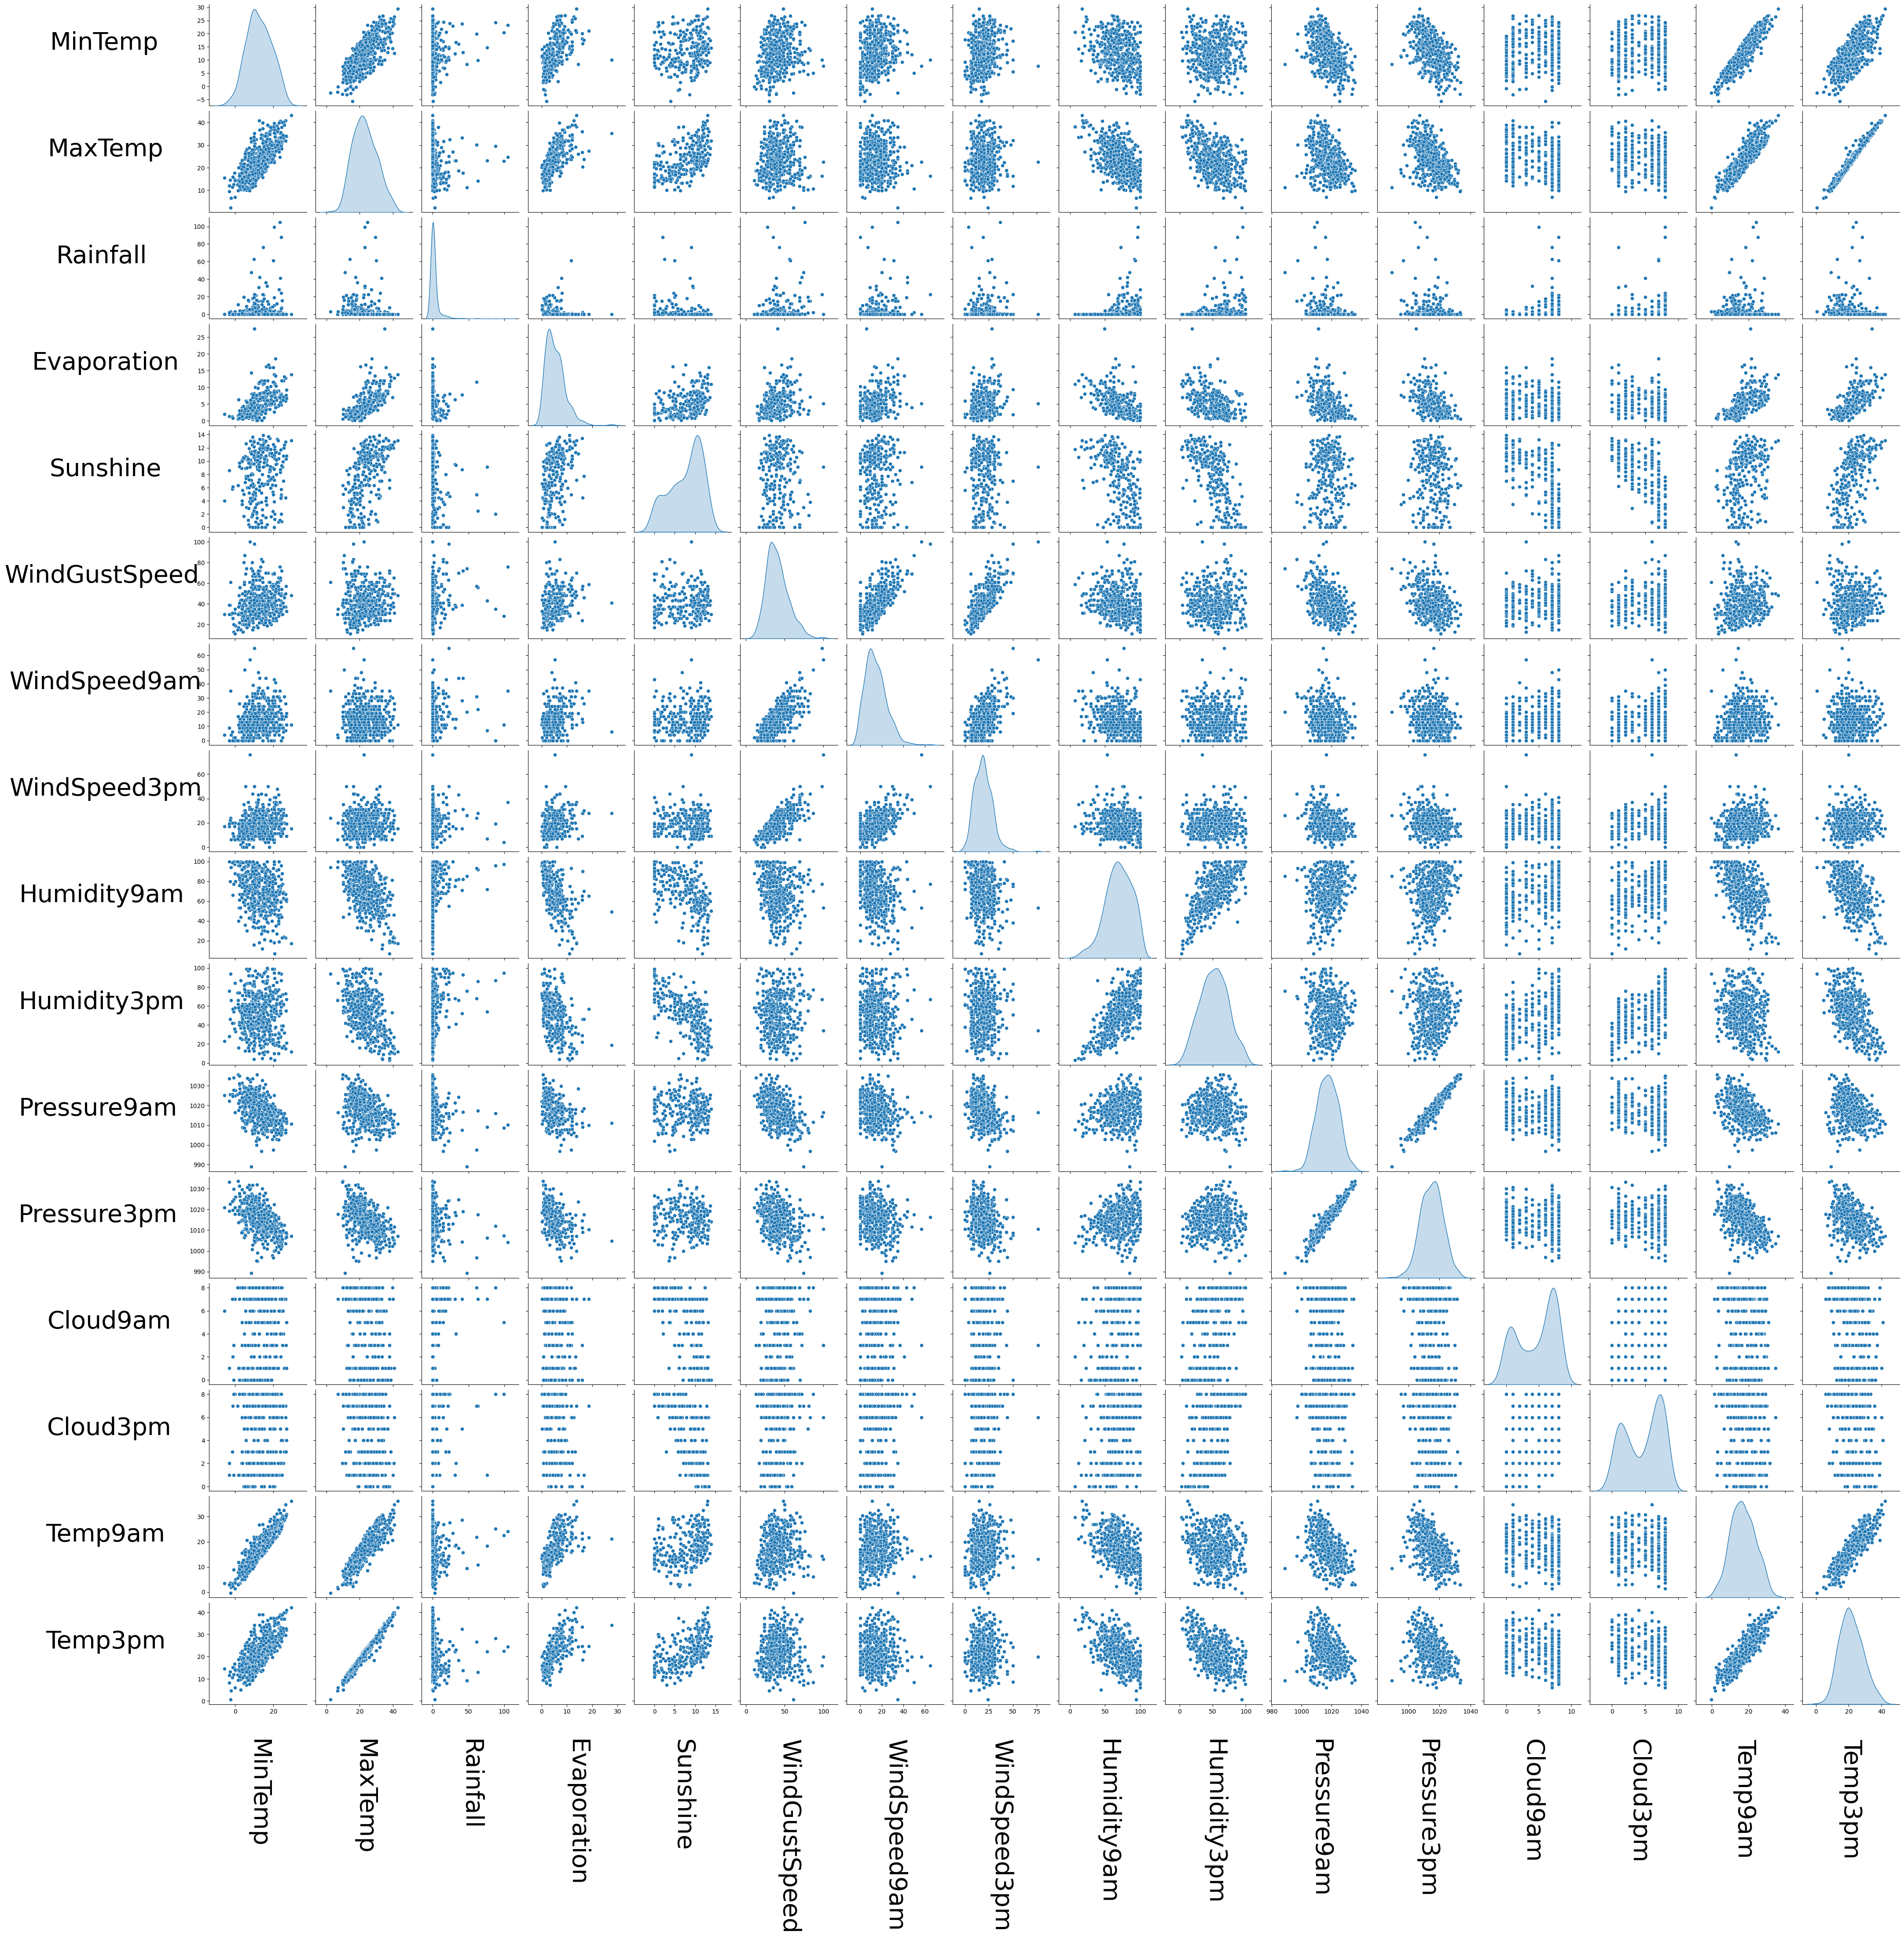

In [ ]:
g = sns.pairplot(dt.iloc[rand_data], diag_kind='kde')
for ax in g.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=-90, fontsize=40, labelpad=40);
    ax.set_ylabel(ax.get_ylabel(), rotation=0, fontsize=40, labelpad=150);

Видна явная корреляция между температурой и влажностью в 9 утра и в 3 дня.

Численно проанализировать корреляцию между признаками можно при помощи матрицы корреляции.

In [ ]:
dt.corr()

<ipython-input-45-17565431b9e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.corr()


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736875  0.104381     0.472989  0.075160   
MaxTemp        0.736875  1.000000 -0.074307     0.595553  0.469390   
Rainfall       0.104381 -0.074307  1.000000    -0.066607 -0.226291   
Evaporation    0.472989  0.595553 -0.066607     1.000000  0.366921   
Sunshine       0.075160  0.469390 -0.226291     0.366921  1.000000   
WindGustSpeed  0.178870  0.071328  0.134978     0.205621 -0.028070   
WindSpeed9am   0.178109  0.018079  0.088074     0.196003  0.011742   
WindSpeed3pm   0.174126  0.050841  0.061296     0.127657  0.056013   
Humidity9am   -0.236926 -0.507118  0.221816    -0.508250 -0.489601   
Humidity3pm    0.004391 -0.509828  0.254877    -0.394670 -0.627573   
Pressure9am   -0.453020 -0.335206 -0.167112    -0.275554  0.037629   
Pressure3pm   -0.463388 -0.429688 -0.125644    -0.299105 -0.021898   
Cloud9am       0.072978 -0.291580  0.195769    -0.189822 -0.673911   
Cloud3pm       0.017827 -0.278339  0.168513    -0.183065 -0.702497   
Temp9am        0.902106  0.887055  0.011792     0.550939  0.291211   
Temp3pm        0.709646  0.984583 -0.079467     0.580341  0.489193   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.178870      0.178109      0.174126    -0.236926   
MaxTemp             0.071328      0.018079      0.050841    -0.507118   
Rainfall            0.134978      0.088074      0.061296     0.221816   
Evaporation         0.205621      0.196003      0.127657    -0.508250   
Sunshine           -0.028070      0.011742      0.056013    -0.489601   
WindGustSpeed       1.000000      0.605928      0.686974    -0.219033   
WindSpeed9am        0.605928      1.000000      0.518251    -0.274180   
WindSpeed3pm        0.686974      0.518251      1.000000    -0.146106   
Humidity9am        -0.219033     -0.274180     -0.146106     1.000000   
Humidity3pm        -0.028536     -0.031865      0.015558     0.666067   
Pressure9am        -0.459155     -0.229440     -0.295857     0.142630   
Pressure3pm        -0.414703     -0.176732     -0.255049     0.189839   
Cloud9am            0.068606      0.023075      0.054920     0.448979   
Cloud3pm            0.107094      0.053459      0.027031     0.353328   
Temp9am             0.153288      0.132218      0.162756    -0.475141   
Temp3pm             0.035890      0.007739      0.028095    -0.501223   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.004391    -0.453020    -0.463388  0.072978  0.017827   
MaxTemp          -0.509828    -0.335206    -0.429688 -0.291580 -0.278339   
Rainfall          0.254877    -0.167112    -0.125644  0.195769  0.168513   
Evaporation      -0.394670    -0.275554    -0.299105 -0.189822 -0.183065   
Sunshine         -0.627573     0.037629    -0.021898 -0.673911 -0.702497   
WindGustSpeed    -0.028536    -0.459155    -0.414703  0.068606  0.107094   
WindSpeed9am     -0.031865    -0.229440    -0.176732  0.023075  0.053459   
WindSpeed3pm      0.015558    -0.295857    -0.255049  0.054920  0.027031   
Humidity9am       0.666067     0.142630     0.189839  0.448979  0.353328   
Humidity3pm       1.000000    -0.024282     0.054166  0.513929  0.520199   
Pressure9am      -0.024282     1.000000     0.961463 -0.126879 -0.143232   
Pressure3pm       0.054166     0.961463     1.000000 -0.058366 -0.081023   
Cloud9am          0.513929    -0.126879    -0.058366  1.000000  0.603770   
Cloud3pm          0.520199    -0.143232    -0.081023  0.603770  1.000000   
Temp9am          -0.222325    -0.425168    -0.472539 -0.140181 -0.127918   
Temp3pm          -0.558402    -0.290302    -0.392289 -0.303785 -0.317727   

                Temp9am   Temp3pm  
MinTemp        0.902106  0.709646  
MaxTemp        0.887055  0.984583  
Rainfall       0.011792 -0.079467  
Evaporation    0.550939  0.580341  
Sunshine       0.291211  0.489193  
WindGustSpeed  0.153288  0.035890  
WindSpeed9am   0.132218  0.007739  
Wi

<ipython-input-46-6d396bc1a78e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dt.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f',


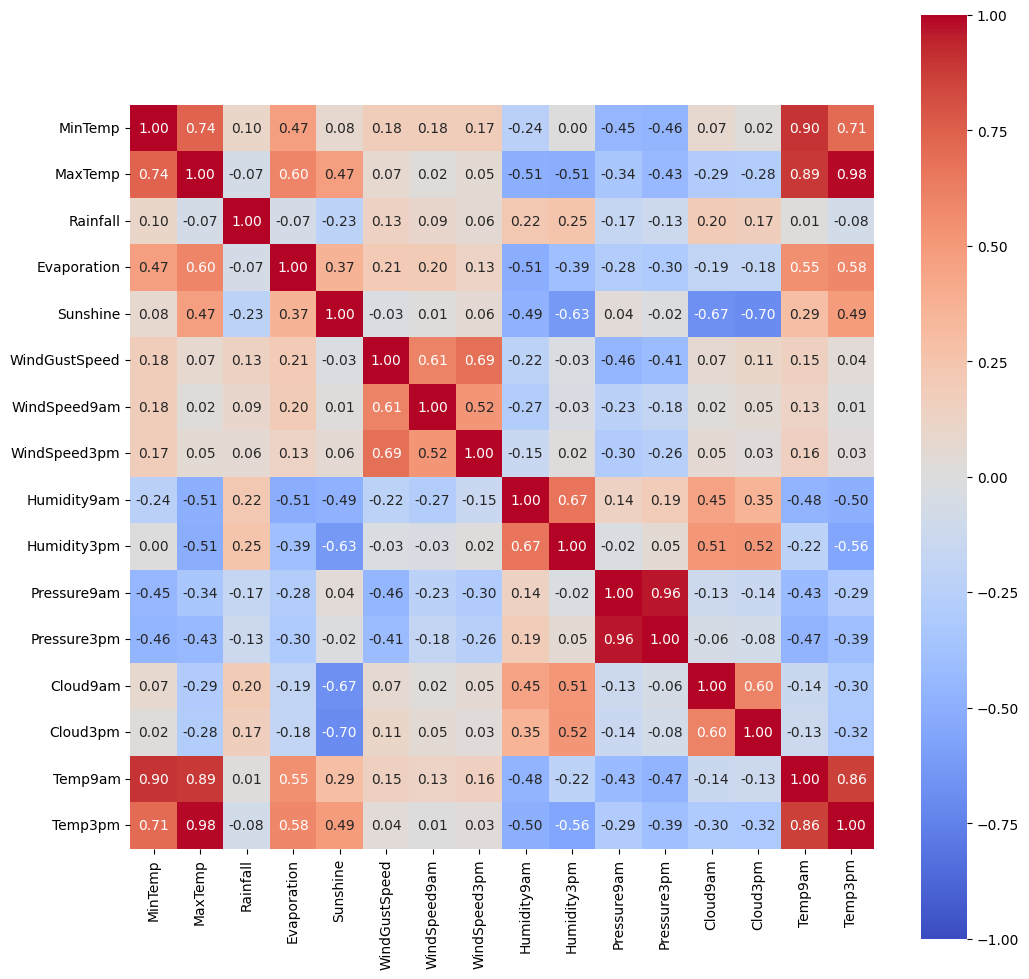

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dt.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt='.2f',
            ax=ax, square=True);

## 3) Обработка пропущенных значений

При помощи встроенного метода isna() можем посмотреть сколько прощенных значений (None) есть в каждом признаке

In [ ]:
dt.isna().sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

Для количественных признаков заполняем таблицу медианой всех значений и выведем на экран для проверки

In [ ]:
dt.fillna(dt.median(axis=0), axis=0 , inplace=True)
dt.isna().sum()

<ipython-input-48-3955c839f674>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.fillna(dt.median(axis=0), axis=0 , inplace=True)


Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      6521
WindGustSpeed       0
WindDir9am       7006
WindDir3pm       2648
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         979
RainTomorrow        0
dtype: int64

Оставшиеся признаки с пропущенными значениями - категориальные. Заполним их модами соотвествующих признаков

In [ ]:
for i in ('WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'):
    dt[i].fillna(dt[i].mode().iloc[0], inplace=True)

In [ ]:
dt.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Видно, что в таблице не осталось пропущенных признаков

## 4) Обработка категориальных признаков

Вспомним признаки, которые необходимо обработать:

In [ ]:
dt.dtypes

Location           string
MinTemp           float64
MaxTemp           float64
Rainfall          float64
Evaporation       float64
Sunshine          float64
WindGustDir      category
WindGustSpeed     float64
WindDir9am       category
WindDir3pm       category
WindSpeed9am      float64
WindSpeed3pm      float64
Humidity9am       float64
Humidity3pm       float64
Pressure9am       float64
Pressure3pm       float64
Cloud9am          float64
Cloud3pm          float64
Temp9am           float64
Temp3pm           float64
RainToday        category
RainTomorrow     category
dtype: object

Столбец `Location` уберем из рассмотрения

In [ ]:
dt = dt.drop('Location', axis=1)

Функцию pandas factorize() можно использовать для кодирования строк в виде числовых значений

In [ ]:
for i in ('WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'):
    dt[i] = pd.factorize(dt[i])[0]

In [ ]:
dt.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir        int64
WindGustSpeed    float64
WindDir9am         int64
WindDir3pm         int64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int64
RainTomorrow       int64
dtype: object

Видно, что все признаки теперь имеют числовой формат, из-за чего их будет удобнее обрабатывать в последующих шагах.

## 5) Нормализация

Выполним стандартизацию

In [ ]:
dt_stand = (dt - dt.mean(axis=0)) / dt.std(axis=0)
dt_stand

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0      0.192032 -0.044616 -0.204738    -0.119581  0.148754    -1.422867   
1     -0.748901  0.264942 -0.275751    -0.119581  0.148754    -1.219853   
2      0.835002  1.278041 -0.157397    -0.119581  0.148754    -1.422867   
3      0.380218  0.912199 -0.252080    -0.119581  0.148754    -1.219853   
4     -0.701854  0.490075 -0.275751    -0.119581  0.148754    -1.422867   
...         ...       ...       ...          ...       ...          ...   
99511 -0.654808 -0.354174 -0.275751    -0.119581  0.148754     0.810294   
99512 -1.360507 -0.199395 -0.275751    -0.119581  0.148754     1.216324   
99513 -1.470283  0.025738 -0.275751    -0.119581  0.148754     1.216324   
99514 -1.344825  0.293083 -0.275751    -0.119581  0.148754     0.404265   
99515 -1.062545  0.518216 -0.275751    -0.119581  0.148754    -1.016838   

       WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Humidity9am  \
0           0.311148   -1.668678   -1.626196      0.677648  ...     0.111811   
1           0.311148   -1.441557   -1.410827     -1.128031  ...    -1.312478   
2           0.082735   -1.214436   -1.195457     -0.789466  ...     0.692077   
3           1.224800   -1.668678   -0.980088      0.564793  ...    -0.732212   
4          -0.374091   -0.987316   -0.980088     -0.902321  ...    -1.101472   
...              ...         ...         ...           ...  ...          ...   
99511       0.082735    0.375408    0.096758      0.564793  ...    -0.679461   
99512      -0.678642    0.602528    0.096758      0.113373  ...    -0.521206   
99513      -0.678642    0.375408   -0.333981     -0.112337  ...    -0.943218   
99514      -1.363880    0.375408    0.742865     -0.112337  ...    -0.679461   
99515      -0.221816    0.375408   -1.626196     -0.563756  ...    -0.837715   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am  \
0        -1.435449    -1.478781    -1.223540  1.458148  0.136036 -0.010570   
1        -1.289212    -1.049339    -1.118933  0.149846  0.136036  0.035806   
2        -0.899244    -1.019723    -1.387923  1.022047  1.555136  0.128556   
3        -1.386703    -1.256656    -1.477587  0.149846  0.136036  0.561394   
4        -1.581687    -0.634706    -0.775223  0.149846  0.136036 -0.103321   
...            ...          ...          ...       ...       ...       ...   
99511    -0.947990     1.542118     1.346812  0.149846  1.082103 -0.829869   
99512    -1.191720     1.038635     0.883550  0.149846  0.136036 -1.169955   
99513    -1.337957     1.023827     0.749055  0.149846  0.136036 -1.061746   
99514    -1.484195     0.860935     0.569728  0.149846  0.136036 -0.938078   
99515    -1.337957     0.490727     0.226019  0.149846  0.136036 -0.690742   

        Temp3pm  RainToday  RainTomorrow  
0      0.018903  -0.533608     -0.538315  
1      0.383042  -0.533608     -0.538315  
2      1.169582  -0.533608     -0.538315  
3      1.053058  -0.533608     -0.538315  
4      0.557829  -0.533608     -0.538315  
...         ...        ...           ...  
99511 -0.243277  -0.533608     -0.538315  
99512 -0.112187  -0.533608     -0.538315  
99513  0.106297  -0.533608     -0.538315  
99514  0.412174  -0.533608     -0.538315  
99515  0.645222  -0.533608     -0.538315  

[99516 rows x 21 columns]

## 6) Разбиение данных на выборки

In [ ]:
y = dt['RainTomorrow']
X = dt_stand.drop(['RainTomorrow'], axis=1)


In [ ]:
dt.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Делим `X` и `y` на тестовую и обучающую выборки

Тренировочных данных будет 75% от общего количества, остальное - тестовые данные

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


print(X_train.shape[0], X_test.shape[0])

74637 24879


In [ ]:
y_test

81773    0
68832    1
73371    0
821      0
62685    0
        ..
70628    1
85243    0
46575    0
4526     0
97128    0
Name: RainTomorrow, Length: 24879, dtype: int64

## 7) Метод k ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
for k in range(1, 22, 2):
    print(f'Обработка k = {k}')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(model.score(X_train, y_train))
    test_score.append(model.score(X_test, y_test))
print('Обработка завершена')

Обработка k = 1
Обработка k = 3
Обработка k = 5
Обработка k = 7
Обработка k = 9
Обработка k = 11
Обработка k = 13
Обработка k = 15
Обработка k = 17
Обработка k = 19
Обработка k = 21
Обработка завершена


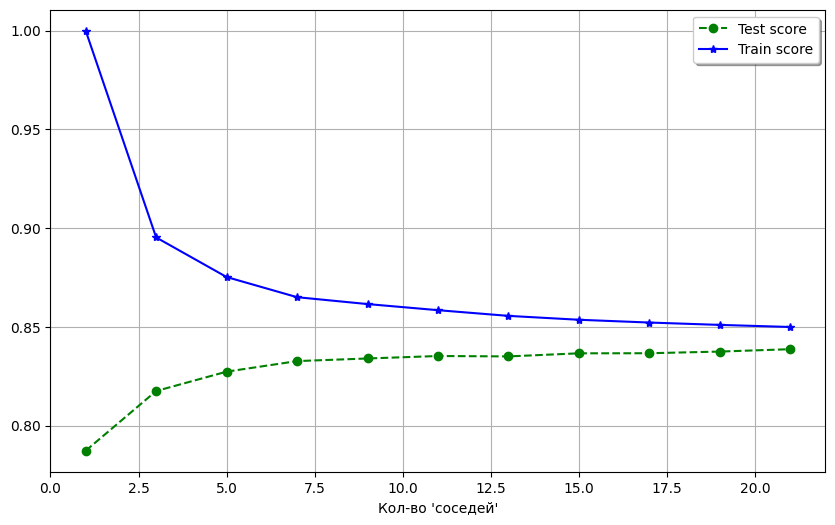

In [ ]:
x_data = np.arange(1, 22, 2)
plt.figure(figsize=(10, 6))
plt.plot(x_data, test_score, label='Test score', color='green', marker='o', linestyle='dashed')
plt.plot(x_data, train_score, label='Train score', color='blue', marker='*')
plt.grid()
plt.xlabel("Кол-во 'соседей'")
plt.legend(shadow=True, loc='best')
pass

## 8) Подсчет ошибок

Посчитаем коэффицинт детерминации для всех `k`

In [ ]:
c = 0
print('Коэффициент детерминации при k =')
for i in range(1, 22, 2):
    print(f' {i} на тестовой выборке: {test_score[c]} \t на тренировочной выборке: {train_score[c]}')
    c += 1

Коэффициент детерминации при k =
 1 на тестовой выборке: 0.7872904859520077 	 на тренировочной выборке: 0.9999464072778916
 3 на тестовой выборке: 0.8175167812211102 	 на тренировочной выборке: 0.8952798210003081
 5 на тестовой выборке: 0.8273242493669359 	 на тренировочной выборке: 0.8752361429317899
 7 на тестовой выборке: 0.8326701233972427 	 на тренировочной выборке: 0.8650267293701516
 9 на тестовой выборке: 0.833996543269424 	 на тренировочной выборке: 0.8615432024331096
 11 на тестовой выборке: 0.8352425740584428 	 на тренировочной выборке: 0.8584482227313531
 13 на тестовой выборке: 0.8350416013505366 	 на тренировочной выборке: 0.8555676139180299
 15 на тестовой выборке: 0.8366091884722054 	 на тренировочной выборке: 0.8535980813805485
 17 на тестовой выборке: 0.8366493830137868 	 на тренировочной выборке: 0.8521912724252046
 19 на тестовой выборке: 0.837493468386993 	 на тренировочной выборке: 0.8509988343582942
 21 на тестовой выборке: 0.8386993046344307 	 на тренировочной в

## 9) Выводы

Был проведен анализ погоды в Австралии с целью предсказания дождя на завтрашний день. Был проведен первичный анализ и предобработка данных. С помощью метода k ближайших соседей удалось увидеть, что стабильный результат получается при `k >= 17` - точность: на обучающей выборке 85% и 83% на тестовой.